In [76]:
# imports:
import numpy as np
import math, os, pickle
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt

import statistics


In [77]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum()
    
def mapTargetsToEncoded(targets, tMap):
    newTargets = []
    for item in targets.tolist():
        newTargets.append(tMap[int(item[0])])
    return newTargets

# functions to use:
def sigmoid(matrix):
    #print("SIGMOID: \n" +str(matrix)+"\n")
    return 1/(1+np.exp(-matrix))

def getInputs(inputs):
    #add bias to layerOne and inputs
    row = inputs.shape[0] if np.ndim(inputs) != 1 else 1
    inputBias = np.ones((row,1)) if np.ndim(inputs) != 1 else np.ones((1))
    inputsWithBias = np.append(inputBias, inputs, 1) if np.ndim(inputs) != 1 else np.append(inputBias, inputs) 
    return inputsWithBias

def networkError(target, netResult):
    print("Target: " + str(target) + " Net Result: " + str(netResult))
    return .5*np.square(target - netResult)

def learning(weights, lr, error, activationsForLayer):
    print("Weights:  " + str(weights.shape))
    print("Learning Rate:  " + str(lr))
    print("Error:  " + str(error.shape))
    print("Activations: "+str(activationsForLayer.shape))
    return weights+lr*error*activationsForLayer

def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)

def hiddenUnitError(temp, activations, error):
    return temp*(1-temp)*(activations*error)

def outputError(target, output):
    # Eouput = output(1-output)(target - output)
    return output*(1-output)*(target - output)

def save_it_all(obj, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def saveNet(theta1, theta2, fileName):
    weights = {"theta1":theta1, "theta2":theta2}
    save_it_all(weights, fileName)
    
def sigmoidDerivative(target, output):
    #E = (t − y) * y *  (1− y) // note: derivative of sigmoid func
    return (target - output) * output * (1 - output)

def netPlot(instance, error):
    instance = list(range(0, instance))
    
    
    with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        fig, ax = plt.subplots()
        ax.plot(instance, error)

        ax.set(xlabel='instance numebr (s)', ylabel='error (net)',
               title='Average Net Error for each batch run')
        ax.grid()

    plt.show()
    
def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)
    
def classifyFish(inputInstance, theta1, theta2):
    # just need to feed forward 
    layerOneActivations = theta1.dot(inputInstance.T)
    print("\t\tLayer One activations: \n"+str(layerOneActivations)+"\n")
    layerOneSig = sigmoid(layerOneActivations)
    print("\t\tSigmoid Result: "+ str(layerOneSig) + "\n")
    inputsforhiddenlayer = getInputs(layerOneSig.T) 
    print("\t\tInputs for the hiden layer is: (b,h1,h2)\n"+str(inputsforhiddenlayer)+"\n")

    outputActivation = theta2.dot(inputsforhiddenlayer.T) 
    print("\t\tActivation for output layer: (h1,h2)\n" + str(outputActivation)+"\n")
        # inplace of sigmoid use softmax?? http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/
    outputFinal = sigmoid(outputActivation)
    print("\t\tFinal output: \n"+ str(outputFinal)+"\n")
    
    return "Yes" if outputFinal >= .5 else "No"

def getArrayFromFile(name):
    array = genfromtxt(name, delimiter=',')
    return array

In [18]:
# neural Net function:
def nn(learningRate, theta1, theta2, inputInstance, targetInstance):
    
    # feed forward:
    # phase One
    layerOneActivations = theta1.dot(inputInstance.T)
    print("\t\tLayer One activations: \n"+str(layerOneActivations)+"\n")
    layerOneSig = sigmoid(layerOneActivations)
    print("\t\tSigmoid Result: "+ str(layerOneSig) + "\n")
    inputsforhiddenlayer = getInputs(layerOneSig.T) 
    print("\t\tInputs for the hiden layer is: (b,h1,h2)\n"+str(inputsforhiddenlayer)+"\n")

    outputActivation = theta2.dot(inputsforhiddenlayer.T) 
    print("\t\tActivation for output layer: (h1,h2)\n" + str(outputActivation)+"\n")

    # phase two
    outputFinal = softmax(outputActivation)
    print("\t\tFinal output (Softmax): \n"+ str(outputFinal)+"\n")

    # network error:
    netError = networkError(targetInstance, outputFinal)
    print("\t\tNetwork Error: \n" + str(netError)+"\n")

    # BACKPROPAGATE
    outputErr = outputError(targetInstance, outputFinal[0])
    print("\t\tOutput Error: \n"+str(outputErr)+"\n")

    hidUnitErr = hiddenUnitError(layerOneSig, layerOneActivations, outputErr)
    print("\t\tHidden unit errors: \n"+str(hidUnitErr)+"\n")

    # learning:
    theta1 = learning(theta1, learningRate, hidUnitErr, inputInstance)
    print("\t\tNext round of weights for layerOne: (b,x1,x2) \n"+ str(theta1)+"\n")

    theta2 = learning(theta2, learningRate, outputErr, inputsforhiddenlayer)
    print("\t\tNext round of weights for layer 2: (b,h1,h2) \n"+ str(theta2)+"\n")
    
    return theta1, theta2, netError


# trian the net


In [20]:
#Main:

# load in fishing normalized set 
data = getArrayFromFile("normalizeFish.csv")
# data = getArrayFromFile("normDigit.csv")
inputs = data[:,0:data.shape[1]-1] # get the input values
targets = data[:, data.shape[1]-1:data.shape[1]] # get the class values

print(targets.shape)

# inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
# targets = np.array([[4],[2],[3]])

inputsWB = getInputs(inputs) # adds bias to the input matrix

numInputNodes = inputsWB.shape[1]
numOutputNodes = 1 if np.unique(targets).shape[0] == 2 else np.unique(targets).shape[0]
numHiddenNodes = int((2/3)*(numInputNodes+numOutputNodes))

print("Input node num including bias: "+ str(numInputNodes))
print("Hidden node num including bias: "+ str(numHiddenNodes))
print("Output node num: " + str(numOutputNodes))



# targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])

# inititlize weights
# (-1/sqrt(n)) < w < (1/sqrt(n))
lowRange = (-1/math.sqrt(numInputNodes))
highRange = math.fabs(lowRange)
theta1 = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes, numInputNodes))
theta2 = np.random.uniform(low=lowRange, high=highRange, size=(numOutputNodes,numHiddenNodes+1)) # add one for the bias node at this layer


print("Theta1 dims: " + str(theta1.shape))
print("Theta2 dims: " + str(theta2.shape))



learningRate = .5
numberProcess = 0
batchError = []
for r in range(0, 5): # batch
    trackedNetError= []
    for index in range(0, inputsWB.shape[0]): # online
        print(color.CYAN+color.BOLD+"----------- Data for batch: "+str(r)+" Online Round: "+str(index)+" ------------"+color.END)
        print("Inputs: \n" + str(inputsWB[index])+"\n")
        print("Learning Rate: \n" + str(learningRate)+"\n")
        print("Theta One: \n" + str(theta1)+"\n")
        print("Theta two: \n" + str(theta2)+"\n")
        print("Target: \n"+ str(targets[index]) + "\n")
        print(color.YELLOW+color.BOLD+"----------Processing on batch:"+str(r)+" with online instance: "+str(index)+"-------------"+color.END)

        theta1, theta2, netError = nn(learningRate, theta1, theta2, np.array([inputsWB[index]]), targets[index])
        trackedNetError.append(netError[0][0])
    numberProcess = numberProcess + 1 
    batchError.append(statistics.mean(trackedNetError))
saveNet(theta1, theta2, "./FishWeights.pkl")


(14, 1)
Input node num including bias: 9
Hidden node num including bias: 6
Output node num: 1
Theta1 dims: (6, 9)
Theta2 dims: (1, 7)
----------- Data for batch: 0 Online Round: 0 ------------
Inputs: 
[1. 0. 1. 0. 0. 0. 1. 0. 0.]

Learning Rate: 
0.5

Theta One: 
[[ 0.18411374  0.24174122  0.08815585  0.08724016 -0.23935595 -0.26419655
   0.28681549  0.18441649  0.12801221]
 [-0.22505673 -0.02393184 -0.10254837  0.2561501  -0.2030604  -0.02162815
  -0.21966737 -0.20481806  0.02139581]
 [-0.24641683  0.29562697 -0.11753926 -0.2392901   0.19647936  0.25726292
   0.25752325  0.06475682  0.00323123]
 [-0.08977188 -0.09238992 -0.23189827 -0.03732317 -0.11546678  0.32072813
   0.23189317 -0.08638092  0.32119505]
 [ 0.21275752 -0.27373634 -0.17102815 -0.24105882  0.32223079  0.09768976
   0.00266331 -0.26920082  0.09166778]
 [-0.12282817 -0.10499036  0.18251499 -0.27697807  0.04740642  0.13276726
   0.32045179 -0.24876869  0.13412651]]

Theta two: 
[[ 0.1773792   0.26272031  0.315      -0.31


		Output Error: 
[0.]

		Hidden unit errors: 
[[ 0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]

Weights:  (6, 9)
Learning Rate:  0.5
Error:  (6, 1)
Activations: (1, 9)
		Next round of weights for layerOne: (b,x1,x2) 
[[ 0.18411374  0.24174122  0.08815585  0.08724016 -0.23935595 -0.26419655
   0.28681549  0.18441649  0.12801221]
 [-0.22505673 -0.02393184 -0.10254837  0.2561501  -0.2030604  -0.02162815
  -0.21966737 -0.20481806  0.02139581]
 [-0.24641683  0.29562697 -0.11753926 -0.2392901   0.19647936  0.25726292
   0.25752325  0.06475682  0.00323123]
 [-0.08977188 -0.09238992 -0.23189827 -0.03732317 -0.11546678  0.32072813
   0.23189317 -0.08638092  0.32119505]
 [ 0.21275752 -0.27373634 -0.17102815 -0.24105882  0.32223079  0.09768976
   0.00266331 -0.26920082  0.09166778]
 [-0.12282817 -0.10499036  0.18251499 -0.27697807  0.04740642  0.13276726
   0.32045179 -0.24876869  0.13412651]]

Weights:  (1, 7)
Learning Rate:  0.5
Error:  (1,)
Activations: (1, 7)
		Next round of weights for layer 2: (


Weights:  (1, 7)
Learning Rate:  0.5
Error:  (1,)
Activations: (1, 7)
		Next round of weights for layer 2: (b,h1,h2) 
[[ 0.1773792   0.26272031  0.315      -0.31824635 -0.10075671  0.2469192
   0.17723806]]

----------- Data for batch: 4 Online Round: 4 ------------
Inputs: 
[1. 0. 0. 0. 1. 1. 0. 0. 1.]

Learning Rate: 
0.5

Theta One: 
[[ 0.18411374  0.24174122  0.08815585  0.08724016 -0.23935595 -0.26419655
   0.28681549  0.18441649  0.12801221]
 [-0.22505673 -0.02393184 -0.10254837  0.2561501  -0.2030604  -0.02162815
  -0.21966737 -0.20481806  0.02139581]
 [-0.24641683  0.29562697 -0.11753926 -0.2392901   0.19647936  0.25726292
   0.25752325  0.06475682  0.00323123]
 [-0.08977188 -0.09238992 -0.23189827 -0.03732317 -0.11546678  0.32072813
   0.23189317 -0.08638092  0.32119505]
 [ 0.21275752 -0.27373634 -0.17102815 -0.24105882  0.32223079  0.09768976
   0.00266331 -0.26920082  0.09166778]
 [-0.12282817 -0.10499036  0.18251499 -0.27697807  0.04740642  0.13276726
   0.32045179 -0.2487

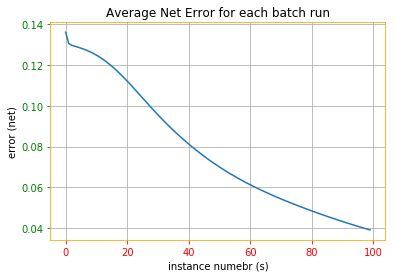

In [44]:
netPlot(numberProcess, batchError)

In [148]:
inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])

In [150]:
inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])
inputs.shape

(3, 2)

In [151]:
targets.shape

(3, 4)

In [153]:
np.unique(targets).shape

(2,)

## Test Two Tutorial


In [115]:
# load in fishing normalized set 
# data = getArrayFromFile("normalizeFish.csv")
data = getArrayFromFile("normDigit.csv")
inputs = data[:,0:data.shape[1]-1] # get the input values
targets = data[:, data.shape[1]-1:data.shape[1]] # get the class values

targetMap = load_objects("./digitTargetCleanDict.pkl")
oneHotTargets = np.asarray(mapTargetsToEncoded(targets, targetMap), dtype=np.float32)

 


In [116]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [193]:
instances = inputs.shape[0]
attributes = inputs.shape[1]

numInputNodes = attributes
numOutputNodes = 1 if np.unique(targets).shape[0] == 2 else np.unique(targets).shape[0]
numHiddenNodes = int((2/3)*(numInputNodes+numOutputNodes))

print("Input node num: "+ str(numInputNodes))
print("Hidden node num: "+ str(numHiddenNodes))
print("Output node num: " + str(numOutputNodes))

lowRange = (-1/math.sqrt(numInputNodes))
highRange = math.fabs(lowRange)

weightHidden = np.random.uniform(low=lowRange, high=highRange, size=(numInputNodes, numHiddenNodes, ))
biasHidden = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes))

weightOutput = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes, numOutputNodes))
biasOutput = np.random.uniform(low=lowRange, high=highRange, size=(numOutputNodes))

print()
print(str(weightHidden.shape))
print(str(biasHidden.shape))
print(str(weightOutput.shape))
print(str(biasOutput.shape))

print()
print(str(inputs.shape))
print()
learningRate = 10e-6

errorCost = []

for epoch in range(10000):
    
    
    print("------------"+str(epoch)+"-----------")
    #### feedforward

    # Phase 1 inputs fed through to hidden
    zetaHidden = np.dot(inputs, weightHidden) + biasHidden
    activationHidden = sigmoid(zetaHidden)

    # Phase 2 hidden fed through to the output
    zetaOutput = np.dot(activationHidden, weightOutput) + biasOutput
    activationOutput = softmax(zetaOutput)

    #### backpropigate with the cross entropy cost function # bad step maybe
    # phase one 
    derivativecost_zetaOutput = activationOutput - oneHotTargets
    print(derivativecost_zetaOutput.shape)
    #print(derivativecost_zetaOutput)
    print()

    derivativeZetaOutput_derivatieWeightOutput = activationHidden
    print(derivativeZetaOutput_derivatieWeightOutput.shape)
    #print(derivativeZetaOutput_derivatieWeightOutput)
    print()

    derivativecost_weightOutput = np.dot(derivativeZetaOutput_derivatieWeightOutput.T, derivativecost_zetaOutput)
    print(derivativecost_weightOutput.shape)
    #print(derivativecost_weightOutput)
    print()

    derivativecost_biasOutput = derivativecost_zetaOutput
    print(derivativecost_biasOutput.shape)
    #print(derivativecost_biasOutput)
    print()
    #     # phase two
    derivativeZetaOutput_derivativeActivationHidden = weightOutput
    print(derivativeZetaOutput_derivativeActivationHidden.shape)
    #print(derivativeZetaOutput_derivativeActivationHidden)
    print()
    derivativeCost_derivativeActivationHidden = np.dot(derivativecost_zetaOutput , derivativeZetaOutput_derivativeActivationHidden.T)
    print(derivativeCost_derivativeActivationHidden.shape)
    #print(derivativeCost_derivativeActivationHidden)
    print()
    derivativeActivationHidden_derivativeZetaHidden = sigmoid_der(zetaHidden)
    print(derivativeActivationHidden_derivativeZetaHidden.shape)
    #print(derivativeActivationHidden_derivativeZetaHidden)
    print()
    derivativeZetaHidden_derivativeWeightHidden = inputs
    print(derivativeZetaHidden_derivativeWeightHidden.shape)
    #print(derivativeZetaHidden_derivativeWeightHidden)
    print()
    derivativeCost_weightHidden = np.dot(derivativeZetaHidden_derivativeWeightHidden.T, derivativeActivationHidden_derivativeZetaHidden * derivativeCost_derivativeActivationHidden)
    print(derivativeCost_weightHidden.shape)
    #print(derivativeCost_weightHidden)
    print()
    derivativeCost_biasHidden = derivativeCost_derivativeActivationHidden * derivativeActivationHidden_derivativeZetaHidden
    print(derivativeCost_biasHidden.shape)
    #print(derivativeCost_biasHidden)
    print()

    #     # Update Weights ================

    weightHidden -= learningRate * derivativeCost_weightHidden
    print(weightHidden.shape)
   # print(weightHidden)
    print()
    biasHidden -= learningRate * derivativeCost_biasHidden.sum(axis=0)
    print(biasHidden.shape)
    #print(biasHidden)
    print()
    weightOutput -= learningRate * derivativecost_weightOutput
    print(weightOutput.shape)
    #print(weightOutput)
    print()
    biasOutput -= learningRate * derivativecost_biasOutput.sum(axis=0)
    print(biasOutput.shape)
    #print(biasOutput)
    print()
    
    loss = np.sum(-oneHotTargets * np.log(activationOutput))
    print('Loss function value: ', loss)
    errorCost.append(loss)
    

Input node num: 64
Hidden node num: 49
Output node num: 10

(64, 49)
(49,)
(49, 10)
(10,)

(3823, 64)

------------0-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  9037.064279229808
------------1-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  9015.144976612992
------------2-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8995.287214885559
------------3-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8977.28577872389
------------4-----------
(3823, 10)

(3823, 49

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8792.45456931036
------------41-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8791.307600373253
------------42-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8790.191979787744
------------43-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8789.104431181204
------------44-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8788.04201313517
------------45-----------


(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8753.028836204216
------------84-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8752.168405254964
------------85-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8751.307803493088
------------86-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8750.446994030197
------------87-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8718.253488813458
------------124-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8717.370470708072
------------125-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8716.486617880882
------------126-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8715.60191945603
------------127-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8714.716364583397
------------128------

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8671.931054426583
------------175-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8670.991736207168
------------176-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8670.051032973954
------------177-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8669.1089337954
------------178-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8634.170646658858
------------214-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8633.169122199417
------------215-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8632.165778840563
------------216-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8631.160605230392
------------217-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8630.153590004564
------------218-----

(10,)

Loss function value:  8590.40877669541
------------256-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8589.320934105399
------------257-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8588.230784364116
------------258-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8587.138315542014
------------259-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8586.043515694619
------------260-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)


(10,)

Loss function value:  8541.399086345184
------------299-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8540.201075107627
------------300-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8539.00022983842
------------301-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8537.796537937622
------------302-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8536.589986789308
------------303-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)


(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8487.168006739925
------------342-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8485.836557710756
------------343-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8484.501718510675
------------344-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8483.163475863266
------------345-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8481.821816477039
------------346-----------
(3823, 10)

(3823

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8429.655646932802
------------383-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8428.174159657592
------------384-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8426.688726194536
------------385-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8425.199332705615
------------386-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8423.70596534101
------------387-----------
(3823, 10)

(3823,

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8365.530179360272
------------424-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8363.875438259478
------------425-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8362.216175330132
------------426-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8360.552376363115
------------427-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8358.884027143697
------------428-----

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8291.97418468814
------------466-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8290.117251654317
------------467-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8288.255197624794
------------468-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8286.388008345091
------------469-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8284.515669565073
------------470-----------
(3823, 10)

(3823,

(49,)

(49, 10)

(10,)

Loss function value:  8209.410919666345
------------508-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8207.326715504962
------------509-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8205.236798939466
------------510-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8203.1411561707
------------511-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8201.039773417882
------------512-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8114.464197581473
------------551-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8112.122176014414
------------552-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8109.773870319315
------------553-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8107.4192678640575
------------554-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8105.05835605356
--------

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8007.931857006543
------------594-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8005.308729656356
------------595-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8002.678814636836
------------596-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  8000.042101367731
------------597-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)


(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7888.885422480245
------------637-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7885.961674601265
------------638-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7883.030744764204
------------639-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7880.092625458365
------------640-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)


(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7756.597199442298
------------680-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7753.358954133299
------------681-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7750.113286939059
------------682-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7746.860194481534
------------683-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)


(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7610.622873999342
------------723-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7607.063838229511
------------724-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7603.497339459947
------------725-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7599.923379422629
------------726-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7596.341959978337
------------727-----

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7450.882873924655
------------766-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7447.00612754972
------------767-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7443.1221133077415
------------768-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7439.230838770474
------------769-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7435.332311651159
------------770-----

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7277.7309255727205
------------809-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7273.5502592460725
------------810-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7269.36277971569
------------811-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7265.168500711244
------------812-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7096.450232380716
------------851-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7091.996852413855
------------852-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7087.5373566231665
------------853-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7083.07176454549
------------854-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  7078.600095848861
------------855-----

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6904.381107934254
------------893-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6899.689135702062
------------894-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6894.991975333725
------------895-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6890.289651418174
------------896-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6885.582188651129
------------897-----------
(3823, 10)

(3823

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6703.144878031004
------------935-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6698.257315391728
------------936-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6693.365680377468
------------937-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6688.470001377584
------------938-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6683.570306853368
------------939-----

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6489.660650151345
------------978-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6484.624381553522
------------979-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6479.58531449631
------------980-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6474.543479592486
------------981-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6276.081817621497
------------1020-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6270.954601614108
------------1021-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6265.825887058172
------------1022-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6260.695704957158
------------1023-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6255.564086302576
------------1024

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6059.802273349659
------------1062-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6054.63856987581
------------1063-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6049.474649003409
------------1064-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6044.310540442091
------------1065-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  6039.146273852044
------------1066-

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5843.074422428648
------------1104-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5837.926514947524
------------1105-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5832.779586646272
------------1106-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5827.633664525222
------------1107-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5822.488775506046
------------1108-----------
(3823, 10)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5617.839130739066
------------1148-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5612.758736335464
------------1149-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5607.680427931238
------------1150-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5602.604228602769
------------1151-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5406.512308455327
------------1190-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5401.538238316404
------------1191-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5396.567135983816
------------1192-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5391.599020213069
------------1193-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5200.360047882417
------------1232-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5195.525552453438
------------1233-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5190.694720956976
------------1234-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5185.867567687852
------------1235-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5181.044106835932
------------1236

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5005.29202141577
------------1273-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  5000.618365148146
------------1274-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4995.94887449047
------------1275-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4991.283559570925
------------1276-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4986.622430420472
------------1277--

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4808.199595469535
------------1316-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4803.713039321185
------------1317-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4799.230999855184
------------1318-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4794.753483270915
------------1319-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4790.280495683104
------------1320-----------
(3823, 10)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4619.422623963178
------------1359-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4615.134879603622
------------1360-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4610.851846194132
------------1361-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4606.573526599279
------------1362-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4439.3306679898
------------1402-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4435.247261946238
------------1403-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4431.1686312491565
------------1404-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4427.094776074643
------------1405-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4268.052074166893
------------1445-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4264.173531589215
------------1446-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4260.299726530574
------------1447-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4256.430657108494
------------1448-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4252.566321399698
------------1449-----------
(3823, 10)

(3823, 49)

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4101.847750816521
------------1489-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4098.17537860219
------------1490-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4094.507626422302
------------1491-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  4090.8444908770334
------------1492-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3948.06244061256
------------1532-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3944.585342639816
------------1533-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3941.1126961036234
------------1534-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3937.64449661219
------------1535-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3934.180739755691
------------1536-

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3805.8047510773104
------------1574-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3802.5106478777734
------------1575-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3799.220798441793
------------1576-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3795.9351977898223
------------1577-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3792.653840932223
------------1

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3674.1806211000776
------------1615-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3671.056747350945
------------1616-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3667.936916585886
------------1617-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3664.8211235362396
------------1618-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3661.709362929204
------------1619-----------
(3823, 10)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3546.398086617246
------------1657-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3543.4394475475306
------------1658-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3540.4846279454473
------------1659-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3537.533622465704
------------1660-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3534.5864257633566
------------1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3425.3625544767074
------------1699-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3422.5597441187965
------------1700-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3419.7605299689003
------------1701-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3416.9649067648434
------------1702-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3414.1728692479237
-----------

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3308.024627945411
------------1742-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3305.3717525662983
------------1743-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3302.7222509322905
------------1744-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3300.07611797792
------------1745-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3297.4333486432715
------------17

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3199.4511551350697
------------1784-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3196.9356831302293
------------1785-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3194.4233772713374
------------1786-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3191.9142327525888
------------1787-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3189.4082447749015
-----------

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3094.086426341595
------------1827-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3091.702843987553
------------1828-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3089.322227397625
------------1829-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3086.9445720685235
------------1830-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  3084.5698735042324
------------18

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2994.2157971682163
------------1870-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2991.9557665117295
------------1871-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2989.6985145956673
------------1872-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2987.444037232498
------------1873-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2901.63975265137
------------1912-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2899.4929076690173
------------1913-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2897.3486718395943
------------1914-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2895.2070412807752
------------1915-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2813.674966338345
------------1954-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2811.634444039878
------------1955-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2809.5963738787505
------------1956-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2807.5607522644686
------------1957-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2805.527575613271
------------1958-----------
(3823, 10)

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2726.1650556828745
------------1998-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2724.2291183750585
------------1999-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2722.295481434362
------------2000-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2720.3641415551947
------------2001-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2646.799039288561
------------2040-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2644.95694097663
------------2041-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2643.117009383452
------------2042-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2641.2792414524915
------------2043-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2639.4436341328574
------------204

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2571.2619869020405
------------2082-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2569.5083224591517
------------2083-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2567.756701072075
------------2084-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2566.007119910181
------------2085-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2564.2595761479415
------------2

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2499.335215853969
------------2124-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2497.664979722536
------------2125-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2495.9966720074585
------------2126-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2494.3302900815543
------------2127-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss funct

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2430.8160076399054
------------2166-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2429.2245542843025
------------2167-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2427.6349228150766
------------2168-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2426.0471107875737
------------2169-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss fun

(10,)

Loss function value:  2365.515997018201
------------2208-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2363.9990040213165
------------2209-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2362.4837336521073
------------2210-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2360.97018362955
------------2211-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2359.458351676305
------------2212-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(382

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2300.3681910772702
------------2252-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2298.9248833868423
------------2253-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2297.4832013228
------------2254-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2296.0431427576655
------------2255-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49,

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2239.7480449529235
------------2295-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2238.3727577879918
------------2296-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2236.999007647581
------------2297-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2235.6267925389575
------------2298-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2234.2561104723563
------------2299-----------
(3823, 1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2183.286812361793
------------2337-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2181.9743978381716
------------2338-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2180.6634391256625
------------2339-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2179.3539343506327
------------2340-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2178.045881642152
------------2

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2129.397643801308
------------2379-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2128.1447905061577
------------2380-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2126.89331658925
------------2381-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2125.643220285526
------------2382-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2077.9454594956146
------------2421-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2076.7490481804043
------------2422-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2075.553944181999
------------2423-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2074.3601458349603
------------2424-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2031.0924645160471
------------2461-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2029.9470689162035
------------2462-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2028.8029157483963
------------2463-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2027.6600034349558
------------2464-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  2026.5183304003253
-----------

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1984.0377052273466
------------2503-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1982.943157268197
------------2504-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1981.8497872583325
------------2505-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1980.7575937058448
------------2506-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1979.6665751207966
------------

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1938.017659642484
------------2546-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1936.9724402356644
------------2547-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1935.9283363667441
------------2548-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1934.8853466257635
------------2549-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

Loss function value:  1895.06294018854
------------2588-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1894.0633802389202
------------2589-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1893.0648781637956
------------2590-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1892.0674326282704
------------2591-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1891.0710422991815
------------2592-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1853.0208605529906
------------2631-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1852.0656048794458
------------2632-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1851.11135121483
------------2633-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1850.1580982966107
------------2634-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss funct

(10,)

Loss function value:  1814.6637304153076
------------2672-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1813.7485390208471
------------2673-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1812.8342991877205
------------2674-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1811.9210097186078
------------2675-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1811.008669417738
------------2676-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1777.9085553557559
------------2713-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1777.0314124721579
------------2714-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1776.155173307964
------------2715-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1775.2798367277146
------------2716-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1743.516655887551
------------2753-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1742.6747904724587
------------2754-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1741.8337844865891
------------2755-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1740.993636851856
------------2756-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1740.1543464915699
------------2

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1700.8558059229972
------------2805-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1700.0572317329484
------------2806-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1699.2594627288172
------------2807-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1698.462497903023
------------2808-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1697.6663362493002


Loss function value:  1661.8939996395588
------------2855-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1661.1344758320918
------------2856-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1660.3757084092413
------------2857-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1659.61769642717
------------2858-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1658.8604389432762
------------2859-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1631.3638216814177
------------2896-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1630.6345487236542
------------2897-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1629.9059944510627
------------2898-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1629.1781579692824
------------2899-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1628.4510383851296
-----------

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1601.3430086041324
------------2938-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1600.6431637265794
------------2939-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1599.9440009677974
------------2940-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1599.2455194816284
------------2941-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(

(10,)

Loss function value:  1573.1997981733412
------------2979-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1572.5272380963715
------------2980-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1571.8553263480412
------------2981-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1571.1840621269264
------------2982-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1570.513444632666
------------2983-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1546.1480280192848
------------3020-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1545.5014034511948
------------3021-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1544.8553952113782
------------3022-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1544.2100025409436
------------3023-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1543.5652246820096
------------3024-----------
(3823, 10)

(3823

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1518.8904740536002
------------3063-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1518.2696786396714
------------3064-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1517.6494678188562
------------3065-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1517.0298408745973
------------3066-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1516.410797091294
------------

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1493.9096859995589
------------3104-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1493.3122814118112
------------3105-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1492.7154328107313
------------3106-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1492.1191395180424
------------3107-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1491.5234008563757
------------3108-----------
(3823, 10)

(3823

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1469.8648677215235
------------3145-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1469.2897119726965
------------3146-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1468.715085134253
------------3147-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1468.140986564242
------------3148-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1446.1564440833768
------------3187-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1445.602959625576
------------3188-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1445.0499778459236
------------3189-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1444.4974981377336
------------3190-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1422.8031433783656
------------3230-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1422.2707361870303
------------3231-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1421.7388063104195
------------3232-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1421.2073531759968
------------3233-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1420.6763762119954
------------3234-----------
(3823, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1401.3598207020243
------------3271-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1400.8465220524672
------------3272-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1400.333677865229
------------3273-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1399.8212875985655
------------3274-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1380.1864311583665
------------3313-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1379.69176175838
------------3314-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1379.1975246850197
------------3315-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1378.7037194263785
------------3316-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1378.2103454712376
------------3

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1360.2541058260704
------------3354-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1359.7767493139079
------------3355-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1359.2998046960217
------------3356-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1358.8232714880346
------------3357-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss fun

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1340.0938183067553
------------3397-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1339.6337437989484
------------3398-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1339.1740609354865
------------3399-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1338.7147692592555
------------3400-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1338.255868313755
------------

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1321.1027151990322
------------3439-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1320.6587031436475
------------3440-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1320.2150640536536
------------3441-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1319.7717974970456
------------3442-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1302.3417240303243
------------3482-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1301.9133664484195
------------3483-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1301.485363769809
------------3484-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1301.0577155867215
------------3485-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1284.2378600781676
------------3525-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1283.8244017701568
------------3526-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1283.4112813153642
------------3527-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1282.9984983288364
------------3528-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1267.159140457413
------------3567-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1266.7595463643388
------------3568-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1266.3602743911135
------------3569-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1265.9613241737766
------------3570-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1250.263036207168
------------3610-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1249.8769705097525
------------3611-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1249.4912117112797
------------3612-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1249.1057594680271
------------3613-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1234.3086214827374
------------3652-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1233.935154760793
------------3653-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1233.5619808868607
------------3654-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1233.1890995358285
------------3655-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1232.8165103830152
------------

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1218.8714766012042
------------3694-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1218.5100344401123
------------3695-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1218.148871835404
------------3696-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1217.7879884794993
------------3697-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1217.4273840652213
------------3698-----------
(3823, 10)

(3823,

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1203.578156635071
------------3737-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1203.228462577667
------------3738-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1202.87903520914
------------3739-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1202.5298742388013
------------3740-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1189.1173303956632
------------3779-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1188.7785912983015
------------3780-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1188.440107002499
------------3781-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1188.1018772330958
------------3782-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(49,)

(49, 10)

(10,)

Loss function value:  1175.1065533004758
------------3821-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1174.7782830140955
------------3822-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1174.4502562753835
------------3823-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1174.1224728238026
------------3824-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1173.7949323991527
------------3825-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1161.2076804385188
------------3864-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1160.8896515437439
------------3865-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1160.571855292491
------------3866-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1160.2542914383107
------------3867-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss func

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1148.665580396319
------------3904-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1148.356668107757
------------3905-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1148.047978847957
------------3906-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1147.7395123828205
------------3907-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1147.4312684785493
------------39

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1135.5808945503147
------------3947-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1135.281364755982
------------3948-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1134.9820481897373
------------3949-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1134.6829446299964
------------3950-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1123.1817200102382
------------3989-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1122.8909582044
------------3990-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1122.6004005583607
------------3991-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1122.3100468620412
------------3992-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1122.0198969056269
------------39

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1111.1431234488489
------------4031-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1110.8607584834165
------------4032-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1110.5785890788593
------------4033-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1110.2966150359346
------------4034-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss fun

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1100.5490715429228
------------4069-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1100.2739999083783
------------4070-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1099.9991164364587
------------4071-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1099.7244209371847
------------4072-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1099.4499132208161
-----------

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1088.8885865273228
------------4112-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1088.6214372205432
------------4113-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1088.3544681173603
------------4114-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1088.0876790376956
------------4115-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1087.8210698016935
------------4116-----------
(3823, 

Loss function value:  1077.8214283464686
------------4154-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1077.561695069827
------------4155-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1077.3021346220448
------------4156-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1077.0427468321493
------------4157-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1076.7835315293787
------------4158-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 4

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1067.3122821886313
------------4195-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1067.059496910801
------------4196-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1066.806877621352
------------4197-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1066.5544241576986
------------4198-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1066.302136357454
------------41

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1056.8363720274217
------------4237-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1056.5904205244738
------------4238-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1056.3446283491544
------------4239-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1056.0989953469848
------------4240-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1055.8535213636726

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1046.8813810847219
------------4278-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1046.6418373117797
------------4279-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1046.402446683641
------------4280-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1046.163209053295
------------4281-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1045.9241242739079
------------4

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1035.088953637735
------------4328-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1034.8568904283475
------------4329-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1034.6249732252058
------------4330-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1034.393201889851
------------4331-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1025.9189570962053
------------4368-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1025.692627748957
------------4369-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1025.4664389961345
------------4370-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1025.2403907057073
------------4371-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(4

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1016.7533495100664
------------4409-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1016.5326779136066
------------4410-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1016.3121416242009
------------4411-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1016.0917405160521
------------4412-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1015.8714744635115
------------4413-----------
(3823, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1007.8154396555038
------------4450-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1007.6002140493678
------------4451-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1007.3851187116258
------------4452-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  1007.1701535223746
------------4453-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  998.8867642782479
------------4492-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  998.6769082911401
------------4493-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  998.4671776546434
------------4494-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  998.2575722545622
------------4495-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  990.1794433508655
------------4534-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  989.9747552622486
------------4535-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  989.7701878396348
------------4536-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  989.5657409742203
------------4537-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  981.4854894305258
------------4577-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  981.2858932493137
------------4578-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  981.0864131661434
------------4579-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  980.8870490774266
------------4580-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  980.6878008796921
------------4581

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  972.8117300909088
------------4621-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  972.6171457669438
------------4622-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  972.4226730924536
------------4623-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  972.2283119688847
------------4624-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  964.5442209510155
------------4664-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  964.3543499131246
------------4665-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  964.1645863853951
------------4666-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  963.9749302739182
------------4667-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  956.4757018881123
------------4707-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  956.2903702656781
------------4708-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  956.1051422083993
------------4709-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  955.9200176267566
------------4710-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  955.7349964313298
------------4711

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  948.5988688154323
------------4750-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  948.4179108667264
------------4751-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  948.2370527218144
------------4752-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  948.0562942953266
------------4753-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  947.8756355019863
------------4754

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  940.7300154176592
------------4794-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  940.5533693012401
------------4795-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  940.37681931944
------------4796-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  940.200365390902
------------4797-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  933.2200487607103
------------4837-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  933.0474640461402
------------4838-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  932.8749720464026
------------4839-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  932.7025726838469
------------4840-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  926.388218151435
------------4877-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  926.2192822812378
------------4878-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  926.050436084184
------------4879-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  925.8816794858932
------------4880-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  920.031073659253
------------4915-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  919.8654937435381
------------4916-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  919.7000007296531
------------4917-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  919.534594546174
------------4918-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  919.3692751217527
------------4919-----------
(3823, 10)

(3823, 49)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  913.4749616590361
------------4955-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  913.3128028466692
------------4956-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  913.1507281374163
------------4957-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  912.9887374628157
------------4958-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  906.577241763456
------------4998-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  906.4186384428758
------------4999-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  906.2601163455804
------------5000-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  906.1016754061297
------------5001-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  905.9433155591523
------------5002-

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  899.985091877125
------------5040-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  899.8298443661432
------------5041-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  899.6746753878699
------------5042-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  899.5195848796651
------------5043-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  893.6836795139892
------------5081-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  893.5316011627053
------------5082-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  893.3795988282457
------------5083-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  893.2276724505651
------------5084-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  893.0758219696816
------------5085-----------
(3823, 10)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  887.0633570397367
------------5125-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  886.9145674337074
------------5126-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  886.7658512599261
------------5127-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  886.6172084609933
------------5128-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  880.7310120728469
------------5168-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  880.5853289339664
------------5169-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  880.4397168110512
------------5170-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  880.2941756491521
------------5171-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  880.1487053933746
------------5172

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  874.3874147727691
------------5212-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  874.2448050798565
------------5213-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  874.1022640367364
------------5214-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  873.9597915908382
------------5215-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  868.3165463972236
------------5255-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  868.1768418155777
------------5256-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  868.0372036699218
------------5257-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  867.8976319098911
------------5258-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  867.7581264851713
------------5259

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  862.3686256475672
------------5298-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  862.2317329437985
------------5299-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  862.0949045547467
------------5300-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  861.9581404321434
------------5301-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  861.8214405277672
------------5302

Loss function value:  856.5397256992912
------------5341-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  856.4055555209952
------------5342-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  856.271447624062
------------5343-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  856.137401962215
------------5344-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  856.0034184892228
------------5345-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  850.9576762157442
------------5383-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  850.8260825227771
------------5384-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  850.6945492058142
------------5385-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  850.5630762204295
------------5386-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  845.4822196088822
------------5425-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  845.3531239451395
------------5426-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  845.2240868279423
------------5427-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  845.0951082146269
------------5428-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  844.9661880625706
------------5429

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  840.2368548775182
------------5466-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  840.1101250694492
------------5467-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  839.9834520917743
------------5468-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  839.8568359034693
------------5469-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  839.7302764635493
------------5470

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  834.9626672827209
------------5508-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  834.8382894725983
------------5509-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  834.7139668029561
------------5510-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  834.5896992343722
------------5511-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  829.6637313355648
------------5551-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  829.5416894212472
------------5552-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  829.4197009853046
------------5553-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  829.2977659898759
------------5554-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  829.1758843971356
------------5555

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  824.4637570839923
------------5594-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  824.3439809836293
------------5595-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  824.2242567651189
------------5596-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  824.1045843920883
------------5597-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  823.9849638281975
------------5598

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  819.2422117121564
------------5638-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  819.1246844459444
------------5639-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  819.0072074925841
------------5640-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  818.8897808171521
------------5641-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  814.2335447053576
------------5681-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  814.1181497476042
------------5682-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  814.0028036295478
------------5683-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  813.8875063176141
------------5684-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  809.3152531741619
------------5724-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  809.2019283795195
------------5725-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  809.0886510081164
------------5726-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  808.9754210276653
------------5727-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  808.8622384059078
------------5728

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  804.4847153016975
------------5767-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  804.3734009071195
------------5768-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  804.2621325733941
------------5769-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  804.1509102694608
------------5770-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  804.0397339642873
------------5771

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  799.7394093789499
------------5810-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  799.6300478937146
------------5811-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  799.5207311585285
------------5812-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  799.4114591435023
------------5813-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  799.3022318187734
------------5814

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  794.9694453013428
------------5854-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  794.862024891394
------------5855-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  794.7546479411485
------------5856-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  794.6473144218602
------------5857-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  790.3892601351837
------------5897-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  790.2836828444946
------------5898-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  790.1781477999991
------------5899-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  790.0726549740175
------------5900-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  789.9672043388949
------------5901

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  785.8872463171222
------------5940-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  785.7834609136917
------------5941-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  785.6797165877808
------------5942-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  785.5760133127284
------------5943-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  785.4723510618963
------------5944-----------
(3823, 10)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  781.5633236150451
------------5982-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  781.4612407749755
------------5983-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  781.3591979122948
------------5984-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  781.2571950012929
------------5985-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  781.1552320162816
------------5986

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  777.6114829386269
------------6021-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  777.5109403658024
------------6022-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  777.4104367838574
------------6023-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  777.309972167928
------------6024-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  777.2095464931715
------------6025-

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  773.4219829481225
------------6063-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  773.3230568258031
------------6064-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  773.2241686681184
------------6065-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  773.125318451078
------------6066-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  773.0265061507121
------------6067-----------
(3823, 10)

(

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  769.2021481786697
------------6106-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  769.1048331208001
------------6107-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  769.0075550140907
------------6108-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  768.9103138354071
------------6109-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss functio

Loss function value:  765.2422860998986
------------6147-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  765.1464672747717
------------6148-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  765.0506844680377
------------6149-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  764.9549376573436
------------6150-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  764.8592268203553
------------6151-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)



(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  761.154327656093
------------6190-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  761.0600376651637
------------6191-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  760.9657827480703
------------6192-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  760.871562883245
------------6193-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  760.7773780491384
------------6194-----------
(3823, 10)

(3

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  757.1312657415547
------------6233-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  757.0384646682592
------------6234-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  756.9456977573009
------------6235-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  756.852964987864
------------6236-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  756.7602663391496
------------6237-

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  753.1714133870911
------------6276-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  753.0800627066012
------------6277-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  752.9887453086027
------------6278-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  752.8974611729992
------------6279-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  752.8062102797119
------------6280-----------
(3823, 10)



Loss function value:  749.2731422189345
------------6319-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  749.18320473918
------------6320-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  749.0932996923872
------------6321-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  749.0034270591491
------------6322-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  748.913586820076
------------6323-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(38

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  745.346319789715
------------6363-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  745.2577912077796
------------6364-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  745.1692942195756
------------6365-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  745.0808288063728
------------6366-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  741.6551081970904
------------6405-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  741.5678905959612
------------6406-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  741.48070381466
------------6407-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  741.393547835075
------------6408-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  741.3064226391089
------------6409---

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  738.0182984994045
------------6447-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  737.9323599006925
------------6448-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  737.8464513733634
------------6449-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  737.7605728998988
------------6450-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  734.3498787146971
------------6490-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  734.2652175355236
------------6491-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  734.1805856867761
------------6492-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  734.0959831515194
------------6493-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  734.0114099128314
------------6494

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  730.7357260126385
------------6533-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  730.6523109114786
------------6534-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  730.5689244243579
------------6535-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  730.4855665349007
------------6536-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  730.4022372267434
------------6537-----------
(3823, 10)



(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  727.1745146053219
------------6576-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  727.0923152760963
------------6577-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  727.0101438680982
------------6578-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  726.9280003654884
------------6579-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  726.8458847524402
------------6580-----------
(3823, 10)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  723.746002480253
------------6618-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  723.6649623441582
------------6619-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  723.583949474442
------------6620-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  723.5029638557681
------------6621-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  723.4220054728132
------------6622--

Loss function value:  720.2857103506633
------------6661-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  720.2058289644342
------------6662-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  720.1259741956262
------------6663-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  720.0461460293993
------------6664-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  719.9663444509242
------------6665-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  716.7959144119975
------------6705-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  716.7171903013497
------------6706-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  716.6384921656822
------------6707-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  716.5598199906417
------------6708-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  713.4340572477257
------------6748-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  713.356437232128
------------6749-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  713.2788425839499
------------6750-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  713.2012732892944
------------6751-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  713.1237293342745
------------6752-----------
(3823, 10)

(

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  710.1191331256802
------------6791-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  710.042591487115
------------6792-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  709.9660746276643
------------6793-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  709.8895825338686
------------6794-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  709.8131151922803
------------6795-

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  706.8500533410966
------------6834-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  706.7745651736733
------------6835-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  706.6991012155648
------------6836-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  706.6236614537345
------------6837-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  706.5482458751551
------------6838

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  703.7747521101033
------------6875-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  703.700245936043
------------6876-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  703.6257634445802
------------6877-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  703.5513046230656
------------6878-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  703.4768694588585
------------6879-----------
(3823, 10)

(

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  700.7392847892323
------------6916-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  700.6657393267743
------------6917-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  700.5922170357801
------------6918-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  700.5187179039726
------------6919-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  700.4452419190842
------------6920-----------
(3823, 10)

(3823, 49)

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  697.5976033203765
------------6959-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  697.5250432540138
------------6960-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  697.4525058391706
------------6961-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  697.3799910639466
------------6962-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  694.2115750504654
------------7006-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  694.1400668791717
------------7007-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  694.0685808092421
------------7008-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  693.9971168291719
------------7009-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  693.9256749274646
------------7010-----------
(3823, 10)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  691.1565402435789
------------7049-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  691.0859721427146
------------7050-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  691.0154256558483
------------7051-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  690.9449007718225
------------7052-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  690.8743974794878
------------7053

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  688.1414926245576
------------7092-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  688.0718439474317
------------7093-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  688.0022164116074
------------7094-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  687.932610006262
------------7095-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  685.3719295184222
------------7132-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  685.3031181263594
------------7133-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  685.234327448573
------------7134-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  685.1655574745403
------------7135-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  685.0968081937459
------------7136-

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  682.5675367201793
------------7173-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  682.4995660627595
------------7174-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  682.4316156941612
------------7175-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  682.3636856041585
------------7176-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  682.2957757825332
------------7177-----------
(3823, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  679.662993933018
------------7216-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  679.5958865481043
------------7217-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  679.5287990186524
------------7218-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  679.461731334737
------------7219-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  679.3946834864399
------------7220--

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  676.8614661378971
------------7258-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  676.7951842146347
------------7259-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  676.7289217358009
------------7260-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  676.6626786917532
------------7261-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  674.094257052095
------------7300-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  674.0287835678255
------------7301-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  673.9633291286232
------------7302-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  673.8978937251186
------------7303-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  673.832477347948
------------7304-----------
(3823, 10)

(3

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  671.4253619126597
------------7341-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  671.360661660407
------------7342-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  671.2959800742351
------------7343-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  671.2313171450312
------------7344-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(10,)

Loss function value:  668.7878612359341
------------7382-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  668.7239188857889
------------7383-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  668.6599948331037
------------7384-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  668.5960890690142
------------7385-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  668.5322015846622
------------7386-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  666.0547541220662
------------7425-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  665.9915906311217
------------7426-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  665.9284450617878
------------7427-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  665.8653174054518
------------7428-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  663.4796554798352
------------7466-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  663.4172197731796
------------7467-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  663.3548016396686
------------7468-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  663.2924010709208
------------7469-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  663.2300180585607
------------7470-----------
(3823, 10)



(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  660.8723906783456
------------7508-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  660.8106858907064
------------7509-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  660.7489983289252
------------7510-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  660.6873279848497
------------7511-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  660.6256748503337
------------7512-----------
(3823, 10)

(3823, 49)

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  658.1735684405891
------------7552-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  658.1126139492271
------------7553-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  658.0516763300441
------------7554-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  657.99075557512
------------7555-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  655.6279163990745
------------7594-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  655.5676637786934
------------7595-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  655.5074277022397
------------7596-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  655.4472081620067
------------7597-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  655.3870051502929
------------7598

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  653.051898392152
------------7637-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  652.992350262562
------------7638-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  652.9328183499683
------------7639-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  652.8733026468755
------------7640-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  652.8138031457926
------------7641-----------
(3823, 10)

(3

(10,)

Loss function value:  650.6236435985683
------------7678-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  650.5647542704759
------------7679-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  650.5058808559754
------------7680-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  650.4470233477659
------------7681-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  650.388181738551
------------7682-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823,

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  648.1639101258082
------------7720-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  648.1056829356373
------------7721-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  648.0474713563954
------------7722-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  647.9892753809743
------------7723-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss functio

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  645.7317280500716
------------7762-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  645.6741504502917
------------7763-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  645.6165881667473
------------7764-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  645.5590411925168
------------7765-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(49,)

(49, 10)

(10,)

Loss function value:  643.3835324281156
------------7803-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  643.3265771645142
------------7804-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  643.2696369369083
------------7805-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  643.2127117385521
------------7806-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  643.1558015627048
------------7807-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  641.0042803821221
------------7845-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  640.9479508707026
------------7846-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  640.8916361155736
------------7847-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  640.8353361101645
------------7848-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  640.7790508479084
------------7849-----------
(3823, 10)

(3823, 49)

(10,)

Loss function value:  638.6510710918653
------------7887-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  638.5953557338526
------------7888-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  638.5396548596448
------------7889-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  638.4839684628402
------------7890-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  638.428296537041
------------7891-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823,

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  636.2683110551501
------------7930-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  636.2132127684681
------------7931-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  636.1581286938537
------------7932-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  636.1030588250718
------------7933-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  633.9663484604089
------------7972-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  633.9118417564175
------------7973-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  633.8573490059138
------------7974-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  633.8028702028219
------------7975-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

Loss function value:  631.689011504353
------------8014-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  631.6350856575398
------------8015-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  631.5811735121754
------------8016-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  631.5272750623371
------------8017-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  631.4733903021057
------------8018-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(

(10,)

Loss function value:  629.3824998451378
------------8057-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  629.3291578561675
------------8058-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  629.2758293171662
------------8059-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  629.2225142223631
------------8060-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  629.16921256599
------------8061-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  627.1008688460004
------------8100-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  627.0481000368976
------------8101-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  626.9953444327084
------------8102-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  626.9426020278084
------------8103-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  626.8898728165767
------------8104

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  624.8436650953519
------------8143-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  624.7914590600268
------------8144-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  624.7392659907778
------------8145-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  624.6870858821223
------------8146-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  624.6349187285822
------------8147

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  622.6621128318438
------------8185-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  622.6104466887872
------------8186-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  622.5587932843359
------------8187-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  622.5071526131426
------------8188-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  622.4555246698633
------------8189

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  620.4519060351148
------------8228-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  620.4007828619655
------------8229-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  620.3496722002992
------------8230-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  620.2985740449022
------------8231-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  618.315445632844
------------8270-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  618.2648434875247
------------8271-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  618.2142536373028
------------8272-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  618.1636760770912
------------8273-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  616.2006835310474
------------8312-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  616.1505934330437
------------8313-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  616.1005154189769
------------8314-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  616.0504494838818
------------8315-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  616.000395622796
------------8316-

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  614.0576601875114
------------8355-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  614.0080852502996
------------8356-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  613.9585221860827
------------8357-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  613.9089709900172
------------8358-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  612.0347722630761
------------8396-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  611.9856801761924
------------8397-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  611.9365997659669
------------8398-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  611.8875310276683
------------8399-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  611.8384739565679
------------8400-----------
(3823, 10)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  609.9829042002846
------------8438-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  609.9342984900462
------------8439-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  609.885704260047
------------8440-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  609.8371215056673
------------8441-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  607.951296112792
------------8480-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  607.9031686248288
------------8481-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  607.8550524253073
------------8482-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  607.806947509716
------------8483-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  605.9396094582756
------------8522-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  605.891952229486
------------8523-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  605.8443061018245
------------8524-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  605.7966710708849
------------8525-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  603.9475136105847
------------8564-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  603.9003188634579
------------8565-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  603.853135034497
------------8566-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  603.8059621193976
------------8567-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  601.9279457625373
------------8607-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  601.881216639102
------------8608-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  601.8344982508886
------------8609-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  601.7877905936937
------------8610-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  599.9745176129372
------------8649-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  599.9282357765555
------------8650-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  599.8819645008523
------------8651-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  599.8357037817207
------------8652-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  599.7894536150558
------------8653-----------
(3823, 10)



(10,)

Loss function value:  598.0855785255624
------------8690-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  598.0397263332381
------------8691-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  597.9938845350422
------------8692-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  597.948053126959
------------8693-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  597.902232104975
------------8694-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  596.1232708639037
------------8733-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  596.0778620197085
------------8734-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  596.0324633989227
------------8735-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  595.9870749976233
------------8736-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  595.9416968118894
------------8737

Loss function value:  594.2248569640639
------------8775-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  594.1798741496144
------------8776-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  594.1349013956224
------------8777-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  594.0899386982528
------------8778-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  594.0449860536728
------------8779-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  592.2996334616614
------------8818-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  592.2550798091933
------------8819-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  592.2105360541249
------------8820-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  592.1660021927089
------------8821-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  592.1214782211998
------------8822

(49,)

(49, 10)

(10,)

Loss function value:  590.4368589212206
------------8860-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  590.3927177558103
------------8861-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  590.348586332115
------------8862-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  590.3044646464706
------------8863-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  590.2603526952141
------------8864-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)


(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  588.5912757392013
------------8902-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  588.5475405929081
------------8903-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  588.5038150360831
------------8904-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  588.4600990651423
------------8905-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  588.4163926765038
------------8906-----------
(3823, 10)



(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  586.8059600921056
------------8943-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  586.7626151953096
------------8944-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  586.7192797425834
------------8945-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  586.675953730419
------------8946-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  586.6326371553114
------------8947-

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  584.9506144672582
------------8986-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  584.9076725209426
------------8987-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  584.8647398695307
------------8988-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  584.8218165095932
------------8989-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  584.7789024377028
------------8990-----------
(3823, 10)



(10,)

Loss function value:  583.2827348912721
------------9025-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  583.2401529213887
------------9026-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  583.1975801139835
------------9027-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  583.155016465696
------------9028-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  583.1124619731678
------------9029-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823,

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  581.5021426670228
------------9067-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  581.4599426478289
------------9068-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  581.4177516514653
------------9069-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  581.3755696746438
------------9070-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(10,)

Loss function value:  579.779305719747
------------9108-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  579.7374729582452
------------9109-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  579.6956490861363
------------9110-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  579.6538341002009
------------9111-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  579.612027997221
------------9112-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  578.0714176456535
------------9149-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  578.02994672666
------------9150-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  577.9884845663967
------------9151-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  577.9470311617104
------------9152-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  576.4193816910013
------------9189-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  576.3782586777347
------------9190-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  576.3371442983253
------------9191-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  576.2960385496834
------------9192-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  576.2549414287209
------------9193-----------


(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  574.8219537550029
------------9228-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  574.781165187069
------------9229-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  574.7403851336522
------------9230-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  574.6996135917233
------------9231-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  574.6588505582547
------------9232-

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  573.1161302952676
------------9270-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  573.0756967462778
------------9271-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  573.035271585879
------------9272-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  572.9948548111049
------------9273-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  572.9544464189912
------------9274-

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  571.4251099295846
------------9312-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  571.3850261645795
------------9313-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  571.3449506648581
------------9314-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  571.3048834275162
------------9315-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

(10,)

Loss function value:  569.7884222803593
------------9353-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  569.7486750255755
------------9354-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  569.7089359181639
------------9355-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  569.6692049552786
------------9356-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  569.629482134075
------------9357-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823,

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  568.2048590481854
------------9393-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  568.1654354821741
------------9394-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  568.1260199507803
------------9395-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  568.086612451214
------------9396-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  568.0472129806858
------------9397-

(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  566.595051619857
------------9434-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  566.5559551994999
------------9435-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  566.5168667004656
------------9436-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  566.4777861200191
------------9437-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 1

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  565.0373465373535
------------9474-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  564.9985648497524
------------9475-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  564.9597909751091
------------9476-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  564.9210249107412
------------9477-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  564.8822666539681
------------9478-----------
(3823, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  563.3767561306471
------------9517-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  563.3383079942046
------------9518-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  563.2998675565527
------------9519-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  563.2614348150648
------------9520-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  563.2230097671152
------------9521

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  561.7304060091444
------------9560-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  561.6922865641894
------------9561-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  561.6541747062051
------------9562-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  561.6160704326185
------------9563-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  561.5779737408575
------------9564

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  560.098089308257
------------9603-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  560.0602937947236
------------9604-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  560.0225057586256
------------9605-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  559.9847251974421
------------9606-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  559.9469521086539
------------9607-

Loss function value:  558.4796033909382
------------9646-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  558.4421271457384
------------9647-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  558.4046582706632
------------9648-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  558.367196763243
------------9649-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  558.3297426210096
------------9650-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  556.8375881909727
------------9690-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  556.8004339104335
------------9691-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  556.7632868924551
------------9692-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  556.7261471346186
------------9693-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  556.6890146345066
------------9694

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  555.2464825103808
------------9733-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  555.2096383498058
------------9734-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  555.1728013488059
------------9735-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  555.1359715050112
------------9736-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  555.0991488160521
------------9737

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  553.6686195859246
------------9776-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  553.6320811602726
------------9777-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  553.5955497932649
------------9778-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  553.5590254825781
------------9779-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  553.5225082258903
------------9780-----------
(3823, 10)



Loss function value:  552.1038127006309
------------9819-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  552.0675757120824
------------9820-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  552.0313456832487
------------9821-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  551.9951226118521
------------9822-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  551.9589064956167
------------9823-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)



(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  550.5159390765151
------------9863-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  550.4800061749694
------------9864-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  550.4440801339263
------------9865-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  550.4081609511545
------------9866-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 

Loss function value:  549.0126386012239
------------9905-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  548.9769919311889
------------9906-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  548.9413520288106
------------9907-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  548.9057188918999
------------9908-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  548.8700925182692
------------9909-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)



(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  547.4859160933878
------------9948-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  547.4505584682909
------------9949-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  547.4152075176244
------------9950-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  547.3798632392421
------------9951-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  547.3445256309988
----

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  545.9715388564175
------------9991-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  545.9364663056263
------------9992-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  545.9014003378455
------------9993-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  545.8663409509702
------------9994-----------
(3823, 10)

(3823, 49)

(49, 10)

(3823, 10)

(49, 10)

(3823, 49)

(3823, 49)

(3823, 64)

(64, 49)

(3823, 49)

(64, 49)

(49,)

(49, 10)

(10,)

Loss function value:  545.8312881428965
------------9995

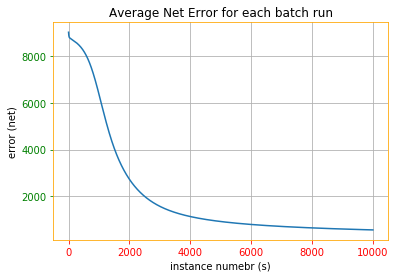

In [195]:
netPlot(10000, errorCost)

###### 